# Plynty Bureau of Labor Statistics Consumer Expenditure Analysis

[BLS Comsumer Expenditure Survey](https://www.bls.gov/cex/home.htm)

[Interview Data Dictionary](https://www.bls.gov/cex/2015/csxintvwdata.pdf)

[Diary Data Dictionary](https://www.bls.gov/cex/2015/csxdiarydata.pdf)

### Where to download the BLS CE PUMD
- The zip files download automatically
- To download the Stub files open the links then right click and choose "Save As..."

[2015 interview zip file](https://www.bls.gov/cex/pumd/data/comma/intrvw15.zip)

[2015 diary zip file](https://www.bls.gov/cex/pumd/data/comma/diary15.zip)

[2015 IntStub file](https://www.bls.gov/cex/pumd/2014/csxintstub.txt)

[2015 IStub file](https://www.bls.gov/cex/pumd/2014/csxistub.txt)

[2015 DStub file](https://www.bls.gov/cex/pumd/2014/csxdstub.txt)

### This Scripts Goals for Plynty
- Create an easy to use analysis engine for the BLS CE PUMD 
- Create a csv files that has average percentages spent on plynty categories for certain income classes
- Create incomeclasses that are stastically significant

##### Importing Libraries 

In [719]:
import pandas as pd
import numpy as np
import glob
import os
import subprocess
import math
import matplotlib.pyplot as plt

### Setting Parameters
- year: the last two number associated with the year of the data
    for example for data from 2015: year = "15"
- minAge: the low bound (inclusive) of the age range you wish to subset by
- maxAge: the high bound (inclusive) of the age range you wish to subset by
- incomeBrackets: array of numbers that you wish to create the new income classes
    the bracketing works as follows (1,2], (2,3], (3,4]
- filesToRead: the strings of the abbreviations associated with the files you wish to read
    options are: "all", "diary", "interview", "dtbd", "expd", "fmld", "memd", "fmli", "itbi", "memi", "mtbi", "ntaxi"

In [720]:
year = "15"
minAge = 55
maxAge = 64
incomeBrackets = [-math.inf,11000,20000,30000,43000,55000,69000,80000,100000,120000,150000,200000,250000,300000,math.inf]
filesToRead = ["fmli", "mtbi"]

### Setting Directory locations and FileNames on your Local Machine

In [721]:
# directory in which the diary and interview folders are held is located
diaryDir = "/Users/adyke/Vizuri/CE_PUMD/diary15/"
interviewDir = "/Users/adyke/Vizuri/CE_PUMD/intrvw15/"

# Directory where stubfiles are located
pathToStubFileDir = "/Users/adyke/Vizuri/Stubfiles/"
rScriptStubfilePathAndName = "/Users/adyke/Vizuri/rFiles/creatingStubCsvs.R"

# Filenames of the Stubfiles
IStubFileName = "IStub2015.txt"
DStubFileName = "DStub2015.txt"
IntStubFileName = "IntStub2015.txt"

# name of interview dir within the interview dir
insideIntrvwDirName = "intrvw"

# name of the directory where you want the output percentages csv
outputDir = "/Users/adyke/Vizuri/outputFiles/"

### Read File Set Function
Function that was built to easily read in and concatinate multiple files that start with the same abbreviation.

#### Parameters:
- fileabbreviation: The four letters associated with the files you wish to read in (ex. "fmli")
- directory: path to the directory that holds files that should be read in.

#### Returns:
- pandas dataframe of all the files that start with the fileabbreviation

In [722]:
def readFileSet(fileabbreviation, directory):
	# finding all the files with names that start with the fileabbreviation
	filenames = glob.glob(directory+fileabbreviation+"*.csv")
	dfs = []
	for filename in filenames:
		dfs.append(pd.read_csv(filename, na_values=["."]))
	largeDataframe = pd.concat(dfs,ignore_index=True)
	return largeDataframe
   

### Reading in the files specified by FilesToRead

In [723]:
if(len(filesToRead)>0):
	print("Reading in files...")
else:
	print("The files to read variable is empty.")

# looping through each file to read
for file in filesToRead:
	if file == "dtbd" or file == "all" or file == "diary":
		print("dtbd")
		dtbd = readFileSet("dtbd", diaryDir)
	if file == "expd" or file == "all" or file == "diary":
		print("expd")
		expd = readFileSet("expd", diaryDir)
	if file == "fmld" or file == "all" or file == "diary":
		print("fmld")
		fmld = readFileSet("fmld", diaryDir)
	if file == "memd" or file == "all" or file == "diary":
		print("memd")
		memd = readFileSet("memd", diaryDir)
	if file == "fmli" or file == "all" or file == "interview":
		print("fmli")
		fmli = readFileSet("fmli", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itbi" or file == "all" or file == "interview":
		print("itbi")
		itbi = readFileSet("itbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itii" or file == "all" or file == "interview":
		print("itii")
		itii = readFileSet("itii", interviewDir+insideIntrvwDirName+year+"/")
	if file == "memi" or file == "all" or file == "interview":
		print("memi")
		memi = readFileSet("memi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "mtbi" or file == "all" or file == "interview":
		print("mtbi")
		mtbi = readFileSet("mtbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "ntaxi" or file == "all" or file == "interview":
		print("ntaxi")
		ntaxi = readFileSet("ntaxi", interviewDir+insideIntrvwDirName+year+"/")
	# does not read form the expn or para subdirectories


Reading in files...
fmli
mtbi


### Using R to convert the Stub files into csv files

In [724]:
# converting the stub files via R 
subprocess.call("Rscript "+rScriptStubfilePathAndName+" "+pathToStubFileDir+" "+IStubFileName+" "+DStubFileName+" "+IntStubFileName, shell=True)
print("Stubfile Csvs created in "+pathToStubFileDir)

Stubfile Csvs created in /Users/adyke/Vizuri/Stubfiles/


### Reading and Cleaning the stubfile CSVs into pandas dataframes

In [725]:
# reading in the stubfiles
DStub = pd.read_csv(pathToStubFileDir+"DStub.csv")
IStub = pd.read_csv(pathToStubFileDir+"IStub.csv")
IntStub = pd.read_csv(pathToStubFileDir+"IntStub.csv")

# removing the index from the stufile
DStub = DStub.drop(DStub.columns[0], axis=1)
IStub = IStub.drop(IStub.columns[0], axis=1)
IntStub = IntStub.drop(IntStub.columns[0], axis=1)

# replacing * with 0 in the level columns
DStub.loc[DStub.level == "*", 'level'] = 0
IStub.loc[IStub.level == "*", 'level'] = 0
IntStub.loc[IntStub.level == "*", 'level'] = 0

### subsetDataframe function
Used to subset any dataframe based on certain parameters
#### Parameters:
- dataframe: the pandas dataframe to subset
- columnName: 
- minValue: this has 3 different uses
  1. the single value you wish to subset by
  2. the array of values that you wish to subset by
  3. the minimum value (inclusive) in a range of values you wish to subset by
- secondColumnName: the name of the second column if you wish to subest the dataframe
- maxValue: the highest value in a range of values you wish to subset by

#### Returns:

- subset pandas dataframe
 

In [726]:
def subsetDataframe(dataframe, columnName,  minValue, secondColumnName = None, maxValue = None):
	if columnName in dataframe.columns:
		# only subsetting based off one column
		if secondColumnName == None:
			# subsetting not within a range
			if maxValue == None:
				value = minValue
				# value is a list
				if isinstance(value, list):
					dataframe = dataframe[dataframe[columnName].isin(value)]
				# value is scalar
				else:
					dataframe = dataframe[dataframe[columnName]==value]
			# the subsetting is within a range
			else:
				dataframe = dataframe[(dataframe[columnName]>=minValue) & (dataframe[columnName]<=maxValue)]
		# subsetting based on two columns
		else:
			# subsetting not within a range
			if maxValue == None:
				value = minValue
				# value is a list
				if isinstance(value, list):
					dataframe = dataframe[(dataframe[columnName].isin(value)) & (dataframe[secondColumnName].isin(value))]
				# value is scalar
				else:
					dataframe = dataframe[(dataframe[columnName]==value) & (dataframe[secondColumnName]==value)]
			# the subsetting is within a range
			else:
				dataframe = dataframe[((dataframe[columnName]>=minValue) & (dataframe[columnName]<=maxValue)) & ((dataframe[secondColumnName]>=minValue) & (dataframe[secondColumnName]<=maxValue)) ]
		return(dataframe)
	else:
		print("Could not a column named "+columnName+" in the dataframe")


### binColumn function
This function is used in the plynty analysis to recode the income classes to specified incomeclasses
#### Parameters:
- dataframe: the pandas dataframe that you wish to bin a column of
- toBinColumnName: name of column you wish use use as values to bin
- binValues: array of values that are the ranges of the bins
- binLabels: labels assocaiated with the bins you wish to create
- binnedColumnName: name of the column that you wish to replace or create

#### Returns:
- dataframe with the binned column

In [727]:
def binColumn(dataframe, toBinColumnName, binValues, binnedColumnName, labels=None):
    if labels==None:
        dataframe[binnedColumnName] = pd.cut(dataframe.loc[:,toBinColumnName], bins=binValues)
    else:
        dataframe[binnedColumnName] = pd.cut(dataframe.loc[:,toBinColumnName], bins=binValues, labels=labels)
    return(dataframe)


### RepresentInts function
function that determines if a string can be repesented as an integer

Created by stackoverflow user [Triptych](https://stackoverflow.com/users/43089/triptych) and posted in [this](https://stackoverflow.com/questions/1265665/python-check-if-a-string-represents-an-int-without-using-try-except) stackoverflow question

#### Parameters:
- s: the string that you wish to check

#### Returns:
- boolean: retruns true if the string can be represented as an integer

In [728]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False


### Categorical UCC Roll Up function

#### Parameters:
- stubfile: the stubfile you are using to create the roll up
- abbreviations: an array of strings taht contain the abbreviations that you wish to roll up 
- ignoreUCCs: an array that you wish to not add into your roll up

#### Returns:
- an array of the uccs associated with your abbreviations

In [729]:
def categoricalUCCRollUp(stubfile,abbreviations,ignoreUCCs=None):
	uccs = []
	for abbreviation in abbreviations:
		startingRows = stubfile[stubfile['ucc']==abbreviation].index.tolist()
		for startingRow in startingRows:
			startingLevel = stubfile.at[startingRow,'level']
			currentRow = startingRow+1
			currentLevel = stubfile.at[currentRow,'level']
			while int(startingLevel) < int(currentLevel):
				if RepresentsInt(stubfile.at[currentRow,'ucc']):
					if ignoreUCCs==None:
						uccs.append(stubfile.at[currentRow,'ucc'])
					else:
						if not(stubfile.at[currentRow,'ucc'] in ignoreUCCs):
							uccs.append(stubfile.at[currentRow,'ucc'])
						
				currentRow += 1
				currentLevel = stubfile.at[currentRow,'level']
	return(uccs)


### Creating the UCC roll ups for Plynty

In [730]:
# creating UCC rollups for the interview files for plynty categories
iTotalExp = categoricalUCCRollUp(IStub,["TOTALE"])
iFoodAtHome = categoricalUCCRollUp(IStub, ["FOODHO", "ALCHOM"])
iFoodAway = categoricalUCCRollUp(IStub, ["FOODAW", "ALCAWA"])
iHousing = categoricalUCCRollUp(IStub, ["HOUSIN"], ignoreUCCs = categoricalUCCRollUp(IStub, ["UTILS"]))
iUtilites = categoricalUCCRollUp(IStub, ["UTILS"])
iClothingAndBeauty = categoricalUCCRollUp(IStub, ["APPARE","PERSCA"])
iTransportation = categoricalUCCRollUp(IStub, ["TRANS"])
iHealthcare = categoricalUCCRollUp(IStub, ["HEALTH"])
iEntertainment = categoricalUCCRollUp(IStub, ["ENTRTA","READIN"])
iMiscellaneous = categoricalUCCRollUp(IStub, ["MISC","TOBACC"])
iCharitableAndFamilyGiving = categoricalUCCRollUp(IStub, ["CASHCO"])
iInsurance = categoricalUCCRollUp(IStub, ["LIFEIN"])
iEducation = categoricalUCCRollUp(IStub, ["EDUCAT"])
iHousingPrinciple = categoricalUCCRollUp(IStub,["MRTPRI"])

['830201',
 '830202',
 '790920',
 '830203',
 '830204',
 '790940',
 '880120',
 '880320',
 '880220']

### Cleaning and reseting the indecies of the MTBI file

In [731]:
# restting the index
mtbi.reset_index()

# Change mtbi UCC column to string
# needed for the loop through rollups
mtbi.UCC = mtbi.UCC.astype(str)

### Adding and Rolling up the Categories into the mtbi Dataframe

In [732]:
rollupNames = ["iTotalExp","iFoodAtHome","iFoodAway","iHousing","iUtilites","iClothingAndBeauty","iTransportation","iHealthcare","iEntertainment","iMiscellaneous","iCharitableAndFamilyGiving","iInsurance","iEducation","iHousingPrinciple"]
rollups = [iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple]

mtbiRolledUp = mtbi

# looping through the different rollup columns
for x in range(len(rollupNames)):
	quarters = 4
	if(rollupNames[x] == "iHousingPrinciple"):
		quarters = -4
	mtbiRolledUp[rollupNames[x]] = np.where(mtbiRolledUp['UCC'].isin(rollups[x]), mtbiRolledUp['COST']*4, 0.0)


### Trimming the mtbi dataframe to be the columns we care about

In [733]:
# renaming the dataframe to make partial runs easy
mtbiTrimmed = mtbiRolledUp

mtbiTrimmed = mtbiTrimmed.loc[: , ['NEWID','iTotalExp','iFoodAtHome','iFoodAway','iHousing','iUtilites','iClothingAndBeauty','iTransportation','iHealthcare','iEntertainment','iMiscellaneous','iCharitableAndFamilyGiving','iInsurance','iEducation','iHousingPrinciple']]


### Creating the Sum for all expenditure category columns for each NEWID
Testing removing the rows that have 0 response for columns that we think are important

In [734]:
# adding up all columns for each new id
iExpensesByNewID = mtbiTrimmed.groupby(['NEWID'],as_index=False).sum()
# removing rows with zero values in key categories
nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
for column in nonZeroColumns:
    iExpensesByNewID = iExpensesByNewID[iExpensesByNewID[column] != 0]
# iExpensesByNewID['iHousing'] = iExpensesByNewID['iHousing']-iExpensesByNewID['iHousingPrinciple']

iExpensesByNewID.head(10)


,NEWID,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,2792005,24400.0,5220.0,1040.0,2988.0,5856.0,0.0,4748.0,2444.0,1584.0,520.0,0.0,0.0,0.0,-3612.0
3,2792095,14900.0,3480.0,24.0,6920.0,2676.0,48.0,1692.0,0.0,60.0,0.0,0.0,0.0,0.0,-1992.0
6,2792155,29128.0,1920.0,1904.0,9520.0,1428.0,0.0,7420.0,900.0,980.0,3056.0,2000.0,0.0,0.0,0.0
8,2792245,99916.0,8920.0,6960.0,44348.0,5600.0,5720.0,15988.0,240.0,10780.0,240.0,0.0,0.0,1120.0,0.0
10,2792275,24343.6,3120.0,520.0,2406.0,5944.0,44.0,3824.0,4329.6,1892.0,1040.0,0.0,1224.0,0.0,0.0
11,2792295,51170.8,7800.0,2600.0,11440.0,720.0,1840.0,1440.0,9330.8,0.0,0.0,16000.0,0.0,0.0,0.0
13,2792385,25444.0,3120.0,4160.0,8580.0,2136.0,940.0,1760.0,1200.0,852.0,0.0,2400.0,296.0,0.0,0.0
15,2792435,27788.0,3120.0,5200.0,9216.0,3664.0,0.0,2400.0,3060.0,888.0,0.0,240.0,0.0,0.0,-4368.0
17,2792525,304832.0,38672.0,6712.0,61736.0,4936.0,120212.0,36316.0,5356.0,30292.0,600.0,0.0,0.0,0.0,-4236.0
19,2792595,141320.0,3900.0,5200.0,22828.0,2324.0,1360.0,92648.0,8060.0,180.0,1200.0,3600.0,20.0,0.0,0.0


### Subestting FMLI for age and recoding the incomebrackets

In [735]:
# subsetting for the age bracket
fmliAge = subsetDataframe(dataframe=fmli, columnName="AGE_REF", minValue=minAge, maxValue=maxAge)
fmliAge = fmliAge.reset_index()

# recoding the income brackets
fmliRecoded = binColumn(dataframe=fmliAge, toBinColumnName="FINCBTXM", binValues=incomeBrackets, binnedColumnName="INCLASS", labels=range(1,len(incomeBrackets)))

### Adding the Income class colum to the ExpensesByNewID dataframe

In [736]:
# combining the fmli and iExpensesByNewID
inclassExpenses = pd.merge(left=fmliRecoded[['NEWID','INCLASS']],right=iExpensesByNewID, on=['NEWID'])
# inclassExpenses.head(10)
# nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
# for column in nonZeroColumns:
#     inclassExpenses = inclassExpenses[inclassExpenses[column] != 0]

### Averaging the expenditures based on incomebrackets

In [737]:
# getting mean for all columns with the same income class besides newId and creating new dataframe
inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# doing median instead of average
# inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).median(),2)

inclassAverages


,INCLASS,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,1,30551.62,4029.33,2034.43,8222.56,3100.98,817.14,5153.16,3246.10,1743.20,668.78,1416.22,85.68,34.02,-663.16
1,2,25435.89,3542.89,1477.99,7159.53,2893.58,701.27,4262.79,2264.84,1352.01,430.23,859.25,109.58,381.94,-643.12
2,3,33261.93,4630.15,2065.51,8398.14,3436.73,862.31,6072.61,3621.26,2073.56,871.01,868.19,154.20,208.24,-807.84
3,4,36981.07,4800.34,2379.77,9282.84,3493.86,1082.79,6485.44,4159.86,2338.04,1022.12,1615.46,220.14,100.40,-1039.10
4,5,40546.83,5110.28,2562.85,9721.36,3962.93,1084.53,8614.99,4331.48,2373.54,723.02,1570.12,253.28,238.45,-1308.11
5,6,45886.45,5350.47,2748.51,11268.22,4326.43,1433.43,8920.14,5495.16,2347.01,1073.93,1761.98,325.49,835.68,-1871.24
6,7,52486.67,6067.72,3139.83,13233.30,4462.92,1615.23,10595.19,6365.07,3014.01,685.51,1955.99,520.89,831.01,-2155.43
7,8,55928.61,6136.49,3373.19,14068.67,4858.88,1545.22,11763.32,5992.45,3464.35,925.66,2608.20,582.44,609.75,-3105.68
8,9,61728.84,6629.48,4119.54,15608.02,5286.30,1874.86,12255.35,6545.26,3981.32,1087.23,2810.79,647.17,883.54,-3757.38
9,10,69698.44,7028.55,4783.22,19505.51,5527.62,2350.57,12952.36,6362.54,4515.21,1063.36,3366.24,506.62,1736.64,-4577.25


### Median of the expenditures based on income brackets

In [738]:
inclassMedians = round(inclassExpenses.ix[:,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).median(),2)
inclassMedians

,INCLASS,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,1,21586.4,3120.0,1276.0,6192.0,2772.0,328.0,1780.0,1264.0,920.0,20.0,0.0,0.0,0.0,0.0
1,2,19738.0,3120.0,1040.0,5154.0,2684.0,348.0,1884.0,1204.0,918.0,0.0,0.0,0.0,0.0,0.0
2,3,26683.4,3862.0,1300.0,6219.0,3074.0,400.0,3000.0,2105.4,1092.0,0.0,0.0,0.0,0.0,0.0
3,4,28778.8,4160.0,1562.0,7688.0,3288.0,520.0,3218.0,2641.0,1118.0,48.0,72.0,0.0,0.0,0.0
4,5,33008.0,4680.0,2080.0,8072.0,3572.0,648.0,4020.0,2892.0,1456.0,36.0,180.0,0.0,0.0,0.0
5,6,37925.0,4908.0,2080.0,9323.0,4066.0,800.0,4474.0,4170.2,1546.0,120.0,360.0,0.0,0.0,0.0
6,7,44760.0,5460.0,2600.0,10522.0,4156.0,952.0,5288.0,3681.4,1690.0,0.0,240.0,0.0,0.0,-816.0
7,8,47836.0,5460.0,2600.0,11214.0,4566.0,1186.0,5416.0,4308.0,1962.0,120.0,680.0,0.0,0.0,-1496.0
8,9,52654.0,6194.0,3392.0,12122.0,5286.0,1370.0,5646.0,4928.0,2126.0,60.0,780.0,0.0,0.0,-2162.0
9,10,58361.0,6118.0,3312.0,15882.0,5264.0,1600.0,6264.0,4625.4,2558.0,168.0,1000.0,0.0,0.0,-3612.0


### Converting the Average expenditures for income classes into percentages of expenditures

In [739]:
# creating new dataframe for the percentages that only includes the plynty categories
percentages = inclassAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    percentages[column] = inclassAverages[column]/inclassAverages.iTotalExp
    
percentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.131886,0.066590,0.269137,0.101500,0.026746,0.168671,0.106250,0.057058,0.021890,0.046355,0.002804,0.001114,-0.021706
1,0.139287,0.058106,0.281474,0.113760,0.027570,0.167590,0.089041,0.053154,0.016914,0.033781,0.004308,0.015016,-0.025284
2,0.139203,0.062098,0.252485,0.103323,0.025925,0.182569,0.108871,0.062340,0.026186,0.026102,0.004636,0.006261,-0.024287
3,0.129805,0.064351,0.251016,0.094477,0.029280,0.175372,0.112486,0.063223,0.027639,0.043683,0.005953,0.002715,-0.028098
4,0.126034,0.063207,0.239756,0.097737,0.026748,0.212470,0.106827,0.058538,0.017832,0.038724,0.006247,0.005881,-0.032262
5,0.116602,0.059898,0.245567,0.094286,0.031239,0.194396,0.119756,0.051148,0.023404,0.038399,0.007093,0.018212,-0.040780
6,0.115605,0.059821,0.252127,0.085030,0.030774,0.201864,0.121270,0.057424,0.013061,0.037266,0.009924,0.015833,-0.041066
7,0.109720,0.060312,0.251547,0.086876,0.027628,0.210327,0.107145,0.061942,0.016551,0.046634,0.010414,0.010902,-0.055529
8,0.107397,0.066736,0.252848,0.085637,0.030373,0.198535,0.106032,0.064497,0.017613,0.045534,0.010484,0.014313,-0.060869
9,0.100842,0.068627,0.279856,0.079308,0.033725,0.185834,0.091287,0.064782,0.015257,0.048297,0.007269,0.024916,-0.065672


### Converting the Median expenditures for income classes into percentages of expenditures

In [747]:
# creating new dataframe for the percentages that only includes the plynty categories
percentagesM = inclassMedians.loc[:,rollupNames[1:]]
for row in range(len(percentagesM)):
    # creating the row total for "row"
    rowTotal = percentagesM.loc[row,percentagesM.columns != 'iTotalExp'].sum()
    # replacing each element with the percent
    for column in rollupNames[1:]:
        percentagesM.loc[row,column] = percentagesM.loc[row,column]/rowTotal
    
# dataframe that contains the percentages for medians
percentagesM

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.176550,0.072205,0.350385,0.156858,0.018560,0.100724,0.071526,0.052060,0.001132,0.000000,0.0,0.0,0.000000
1,0.190802,0.063601,0.315191,0.164139,0.021282,0.115215,0.073630,0.056140,0.000000,0.000000,0.0,0.0,0.000000
2,0.183447,0.061751,0.295406,0.146017,0.019000,0.142502,0.100008,0.051871,0.000000,0.000000,0.0,0.0,0.000000
3,0.171088,0.064240,0.316183,0.135225,0.021386,0.132346,0.108616,0.045980,0.001974,0.002961,0.0,0.0,0.000000
4,0.169344,0.075264,0.292083,0.129252,0.023448,0.145462,0.104646,0.052685,0.001303,0.006513,0.0,0.0,0.000000
5,0.154111,0.065312,0.292742,0.127672,0.025120,0.140483,0.130944,0.048544,0.003768,0.011304,0.0,0.0,0.000000
6,0.161666,0.076984,0.311547,0.123055,0.028188,0.156573,0.109003,0.050039,0.000000,0.007106,0.0,0.0,-0.024161
7,0.151599,0.072190,0.311362,0.126777,0.032930,0.150378,0.119614,0.054476,0.003332,0.018880,0.0,0.0,-0.041537
8,0.155855,0.085351,0.305017,0.133008,0.034472,0.142066,0.124000,0.053495,0.001510,0.019627,0.0,0.0,-0.054401
9,0.141688,0.076703,0.367814,0.121910,0.037055,0.145069,0.107121,0.059241,0.003891,0.023159,0.0,0.0,-0.083651


### Creating Csv of percentages

In [741]:
# percentages.to_csv(outputDir+"plyntyCsv.csv")

# Exploratory in the data

### Graph of number of observations in the income brackets

[591 584 580 558 556 505 492 383 347 315 272 209 127  90]
5609


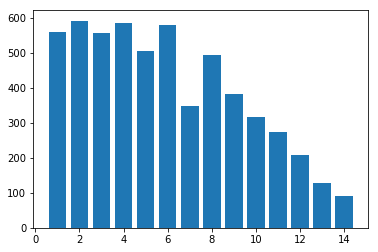

In [742]:
# ploting the number of people in each bracket
print(fmliRecoded['INCLASS'].value_counts().values)
print(fmliRecoded['INCLASS'].value_counts().values.sum())
plt.bar(list(fmliRecoded['INCLASS'].value_counts().index.tolist()), fmliRecoded['INCLASS'].value_counts().values, align='center')
plt.show()

### Checking the Standard Deviations

What I'm finding is that the higher income brackets (>150k) have high standard deviations for housing
this might have to do with the non reporting

In [743]:
inclassSD = inclassExpenses.groupby(['INCLASS'],as_index=False).std()
inclassSD.iloc[:,~inclassSD.columns.isin(['INCLASS','NEWID'])]

,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,28023.754334,2727.497386,3274.992054,9422.170009,2092.896353,1148.994955,13255.897003,5622.502292,4973.170800,2475.278040,10287.658065,350.869943,166.152694,1489.285553
1,21446.740460,1947.676153,1319.530336,8088.846232,1710.686861,1014.579575,12005.393042,4129.240005,2734.634573,824.804997,2956.897276,321.069541,3214.726501,2114.926690
2,25039.542657,3145.036340,2235.874975,10273.093834,1874.349966,1660.072530,15035.036111,4607.511788,5312.320228,2908.947984,2016.951913,412.534601,1264.420477,2040.874947
3,29317.271012,3027.666535,3103.684387,7614.725525,1923.752774,2242.648254,14855.860861,5579.882368,12108.001236,2711.128888,7719.888185,613.569005,1043.520506,2100.564320
4,29069.051495,3077.945681,2070.143833,7635.581268,2019.576724,1295.698408,20947.342519,5111.139152,8621.431809,1429.917014,3328.972659,748.623468,1522.280075,2594.420024
5,30411.457330,3063.460084,2706.312615,10220.436780,2050.695524,3166.187328,20024.158171,5893.695804,3371.227895,2562.565581,3867.873562,810.588688,7290.504710,2834.738158
6,38459.026459,3032.462293,2712.497053,12146.509574,1953.081272,2447.342194,23099.977040,8399.788837,10593.264399,1342.080807,6212.477082,1241.873308,6172.165487,3034.340718
7,35262.789572,2938.953292,3552.037394,10572.059217,2010.476014,1593.500076,27349.386439,6065.503775,8212.661317,1873.464893,4479.709398,1241.471807,2853.280015,5813.538836
8,39344.026130,3426.254321,2963.364601,12558.597468,2173.894874,2009.514651,25874.662026,7530.532414,11709.746363,4954.207485,6620.027869,2135.573132,4947.324774,4668.015633
9,42064.123972,4253.312188,6793.850971,18921.947472,2506.472511,2571.408941,26151.984075,7698.893380,7784.876116,3129.323726,7008.654629,1162.613029,7091.223641,6730.785064


### Checking negative values for housing for incomeclasses

In [744]:
for inclass in range(len(incomeBrackets)-1):
    print(len(inclassExpenses.loc[inclassExpenses.iHousing <= 0].loc[inclassExpenses.INCLASS == inclass]))
inclassExpenses.loc[inclassExpenses.iHousing <= 0]

0
0
0
1
0
2
0
0
0
0
0
0
0
0


,NEWID,INCLASS,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
345,2997872,5,40896.0,7768.0,3272.0,-2572.0,6816.0,0.0,5424.0,5276.0,0.0,140.0,0.0,0.0,14772.0,0.0
971,2997873,3,13388.0,7780.0,3512.0,-12980.0,6916.0,400.0,3800.0,3600.0,0.0,360.0,0.0,0.0,0.0,0.0
2590,2997875,5,17228.0,8156.0,3532.0,-10180.0,6148.0,0.0,4532.0,3600.0,120.0,1320.0,0.0,0.0,0.0,0.0


### Looking deeper into housing and why its janky
- What im finding is that the negative values in the housing column stay consistent while the max values go up
- Negative values come from the housing principle
- The large negatives could happen when the iHousing reporting is 0 and they report the housing principle
- for some reason there is an issue with the 0 incomeclass

In [745]:
# max and min of housing per income class
for inclass in range(1,len(incomeBrackets)-1):
    print(inclass)
    print(inclassExpenses.iHousing.loc[inclassExpenses.INCLASS == inclass].describe())

1
count      285.000000
mean      8222.561404
std       9422.170009
min        190.000000
25%       2892.000000
50%       6192.000000
75%      10032.000000
max      97164.000000
Name: iHousing, dtype: float64
2
count      314.000000
mean      7159.525478
std       8088.846232
min         30.000000
25%       2725.000000
50%       5154.000000
75%       8913.000000
max      72380.000000
Name: iHousing, dtype: float64
3
count       392.000000
mean       8398.142857
std       10273.093834
min      -12980.000000
25%        3300.000000
50%        6219.000000
75%       10185.000000
max      100556.000000
Name: iHousing, dtype: float64
4
count      436.000000
mean      9282.844037
std       7614.725525
min        120.000000
25%       4146.000000
50%       7688.000000
75%      12023.000000
max      59276.000000
Name: iHousing, dtype: float64
5
count      419.000000
mean      9721.360382
std       7635.581268
min     -10180.000000
25%       4081.000000
50%       8072.000000
75%      13444.000000


### Look into the stub files to see if there are changed abbreviations